In [1]:
#!pip install --upgrade "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install torch torchvision torchaudio pennylane cotengra quimb torchmetrics --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.0/148.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.7/500.7 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 15.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 16.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167

In [2]:
# Import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import numpy as np

import pandas as pd
from sklearn import datasets
import seaborn as sns

import time

import functools

from typing import List, Union, Tuple, Dict, Optional, Any
from typing import Callable



import torch
import torchvision  


import torchmetrics



import os, cv2, itertools # cv2 -- OpenCV
import shutil
import zipfile
%matplotlib inline




sns.set()

seed = 1701
rng = np.random.default_rng(seed=seed)

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

torch.set_default_dtype(torch.double)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#COMPLEX_DTYPE = torch.cfloat #torch.cdouble
#REAL_DTYPE = torch.float

print(device)

cuda


In [3]:
preprocess = torchvision.transforms.Compose([
    torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,)),
    #torchvision.transforms.Lambda(lambda x: x.type(COMPLEX_DTYPE))
])

train_dataset = torchvision.datasets.MNIST(
    "MNIST",
    train=True,
    download=True,
    transform=preprocess,
)
test_dataset = torchvision.datasets.MNIST(
    "MNIST",
    train=False,
    download=True,
    transform=preprocess,
)
dummy_trainloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True
)
dummy_testloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=True
)

dummy_x, dummy_y = next(iter(dummy_trainloader))

print(dummy_x.shape)  # 64x32x32
print(dummy_y.shape)  # 64
print(dummy_y)
print(dummy_x[0,0,16])

100%|██████████| 9912422/9912422 [00:00<00:00, 298751203.57it/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 98324426.81it/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 174811470.52it/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15576883.70it/s]


Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw

torch.Size([64, 1, 32, 32])
torch.Size([64])
tensor([7, 7, 5, 7, 4, 7, 7, 7, 5, 4, 7, 2, 7, 8, 1, 1, 1, 6, 4, 1, 5, 1, 2, 7,
        8, 0, 8, 6, 1, 8, 8, 7, 4, 4, 7, 9, 5, 4, 3, 9, 6, 5, 6, 0, 3, 9, 5, 3,
        5, 1, 0, 4, 2, 3, 2, 0, 1, 5, 6, 4, 8, 6, 3, 9])
tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000,  0.2863,  0.7098, -0.7333, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000])


In [4]:
class SimpleNet(torch.nn.Module):
  def __init__(self):
    super(SimpleNet, self).__init__()

    self.layers = torch.nn.Sequential(
        torch.nn.Conv2d(1, 32, kernel_size=3),
        torch.nn.Conv2d(32, 16, kernel_size=3),
        torch.nn.Flatten(),
        torch.nn.Linear(16*28*28, 10),
    )

  def forward(self, x):
    return self.layers(x)

net = SimpleNet().to(device)
test_img = dummy_x.to(device)
print(test_img.shape)
print(net)
test_out = net(test_img)
print(test_out.shape)

torch.Size([64, 1, 32, 32])
SimpleNet(
  (layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=12544, out_features=10, bias=True)
  )
)
torch.Size([64, 10])


In [5]:
BATCH_SIZE = 200
LEARNING_RATE = 3e-4
STEPS = 100
PRINT_EVERY_PERCENT = 0.2

def train(
    model,
    optim=torch.optim.SGD,
    criterion=torch.nn.CrossEntropyLoss,
    accuracy = torchmetrics.Accuracy,
    steps = 100,
    print_every_percent=0.1,
    batchsize = 100,
    lr = 0.001,
    device=torch.device("cpu")
):
  trainloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batchsize, shuffle=True
  )
  testloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batchsize, shuffle=True
  )

  n_train_batches = len(trainloader)
  n_test_batches = len(testloader)
  print_every_train_batch = int(n_train_batches*print_every_percent)
  print_every_test_batch = int(n_test_batches*print_every_percent)

  print(f"Number of train batches = {n_train_batches}, Number of test batches = {n_test_batches}")
  print(f"Print every train batch = {print_every_train_batch}, Print every test batch = {print_every_test_batch}")

  model.to(device)
  optimizer = optim(model.parameters(), lr=lr, momentum=0.9)
  loss = criterion()
  acc_func = accuracy(task="multiclass", num_classes=10).to(device)
  step_train_losses = []
  step_test_losses = []
  step_train_accs = []
  step_test_accs = []
  for i in range(steps):
    step_start = time.time()
    batch_train_loss = []
    batch_train_acc = []
    batch_test_loss = []
    batch_test_acc = []
    # train
    model.train()
    for batchid, (images, labels) in enumerate(trainloader):
      batch_start = time.time()
      images, labels = images.to(device), labels.to(device)
      optimizer.zero_grad()
      outputs = model(images)
      train_loss = loss(outputs, labels)
      train_loss.backward()
      optimizer.step()
      train_acc = acc_func(outputs, labels)
      batch_train_loss.append(train_loss.item())
      batch_train_acc.append(train_acc.item())
      batch_finish = time.time()

      if (batchid) % print_every_train_batch == 0:
        print(f"Training at step={i}, batch={batchid}, train loss = {train_loss.item()}, train acc = {train_acc.item()}, time = {batch_finish-batch_start}")

    # eval
    model.eval()
    with torch.no_grad():
      for batchid, (images, labels) in enumerate(testloader):
        batch_start = time.time()
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        test_loss = loss(outputs, labels)
        test_acc = acc_func(outputs, labels)
        batch_test_loss.append(test_loss.item())
        batch_test_acc.append(test_acc.item())
        batch_finish = time.time()
        if (batchid) % print_every_test_batch == 0:
          print(f"Testing at step={i}, batch={batchid}, test loss = {test_loss.item()}, test acc = {test_acc.item()}, time = {batch_finish-batch_start}")

    step_train_losses.append(np.mean(batch_train_loss))
    step_test_losses.append(np.mean(batch_test_loss))
    step_train_accs.append(np.mean(batch_train_acc))
    step_test_accs.append(np.mean(batch_test_acc))
    step_finish = time.time()
    print(f"Step {i} finished in {step_finish-step_start}, Train loss = {step_train_losses[-1]}, Test loss = {step_test_losses[-1]}; Train Acc = {step_train_accs[-1]}, Test Acc = {step_test_accs[-1]}")

  return step_train_losses, step_test_losses, step_train_accs, step_test_accs

train_losses, test_losses, train_accs, test_accs = train(net,
                                                        optim=torch.optim.SGD,
                                                        criterion=torch.nn.CrossEntropyLoss,
                                                        accuracy = torchmetrics.Accuracy,
                                                        steps = STEPS,
                                                        print_every_percent=PRINT_EVERY_PERCENT,
                                                        batchsize = BATCH_SIZE,
                                                        lr = LEARNING_RATE,
                                                        device=device)

Number of train batches = 300, Number of test batches = 50
Print every train batch = 60, Print every test batch = 10
Training at step=0, batch=0, train loss = 2.319827683023284, train acc = 0.07999999821186066, time = 0.18504643440246582
Training at step=0, batch=60, train loss = 1.491988642656334, train acc = 0.7450000047683716, time = 0.013051986694335938
Training at step=0, batch=120, train loss = 0.6194897566306803, train acc = 0.8600000143051147, time = 0.013248443603515625
Training at step=0, batch=180, train loss = 0.49777936429253633, train acc = 0.8600000143051147, time = 0.013044357299804688
Training at step=0, batch=240, train loss = 0.38679614000032847, train acc = 0.8849999904632568, time = 0.013144969940185547
Testing at step=0, batch=0, test loss = 0.3522306403477841, test acc = 0.9100000262260437, time = 0.0024852752685546875
Testing at step=0, batch=10, test loss = 0.31443101241260085, test acc = 0.9300000071525574, time = 0.0025634765625
Testing at step=0, batch=20, t

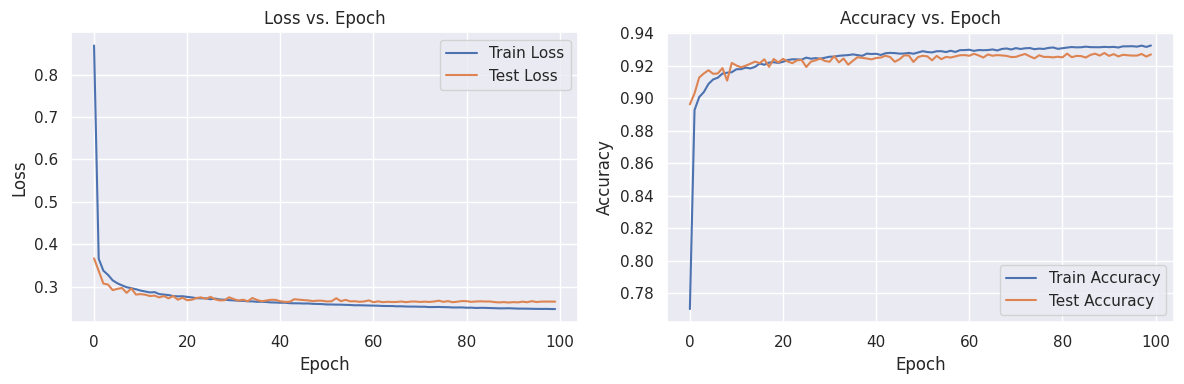

In [6]:
# plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the losses
ax1.plot(train_losses, label='Train Loss')
ax1.plot(test_losses, label='Test Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs. Epoch')
ax1.legend()

# Plot the accuracies
ax2.plot(train_accs, label='Train Accuracy')
ax2.plot(test_accs, label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs. Epoch')
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig("0-mnist_simple_cnn.pdf")
# Display the plots
plt.show()

In [7]:
import json


res_dict = {
    "train_losses": train_losses,
    "test_losses": test_losses,
    "train_accs": train_accs,
    "test_accs": test_accs
}

with open("0-mnist_simple_cnn.json", "w") as f:
    json.dump(res_dict, f)